In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
import csv

In [ ]:
items = pd.read_csv("items.csv", delimiter="|")
items

,itemID,title,author,publisher,main topic,subtopics
0,21310,Princess Poppy: The Big Mix Up,Janey Louise Jones,Penguin Random House Children's UK,YFB,[5AH]
1,73018,Einfach zeichnen! Step by Step,Wiebke Krabbe,Schwager und Steinlein,AGZ,"[5AJ,AGZ,WFA,YBG,YBL,YNA,YPA]"
2,19194,Red Queen 1,Victoria Aveyard,Orion Publishing Group,YFH,"[5AP,FBA]"
3,40250,Meine Kindergarten-Freunde (Pirat),NaN,Ars Edition GmbH,YB,"[5AC,5AD,YBG,YBL,YF]"
4,46107,Mein großes Schablonen-Buch - Wilde Tiere,Elizabeth Golding,Edition Michael Fischer,WFTM,"[WD,WFTM,YBG,YBL,YBLD,YBLN1]"
...,...,...,...,...,...,...
78025,37678,Timeless Fairy Tales,"Brothers Grimm, Marie-Catherine Baroness D'Aulnoy",MEDIAMORPHOSIS,YFA,[YFJ]
78026,68688,Demon Games,A. Witt Timothy a. Witt,iUniverse,FMB,[]
78027,57291,Lori and the Lion's Den,A. M. Glass,Xlibris,YFU,[]
78028,78130,The Everywhere Armchair,Ersila Bee,ELOQUENT BOOKS,YFC,"[YFG,YFH]"


In [ ]:
transactions = pd.read_csv("transactions.csv", delimiter="|")
transactions

,sessionID,itemID,click,basket,order
0,0,21310,1,0,0
1,1,73018,1,0,0
2,2,19194,1,0,0
3,3,40250,1,0,0
4,4,46107,1,0,0
...,...,...,...,...,...
365138,279351,70183,1,0,0
365139,279352,39716,1,0,0
365140,279353,35260,1,0,0
365141,279353,18805,4,0,0


In [ ]:
# data = pd.merge(items, transactions, on=["itemID"])
# data

In [ ]:
data_click = items.filter(['itemID'], axis=1)
data_click['click'] = np.NaN
for x in range(len(data_click)) :
    tmp = transactions.loc[transactions['itemID'] == data_click['itemID'].iloc[x]].reset_index()
    n = 0
    for y in range(len(tmp)):
        n = n + tmp['click'].iloc[y]
    data_click['click'].iloc[x] = n

C:\Users\farha\anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [ ]:
data_basket = items.filter(['itemID'], axis=1)
data_basket['basket'] = np.NaN
for x in range(len(data_basket)) :
    tmp = transactions.loc[transactions['itemID'] == data_basket['itemID'].iloc[x]].reset_index()
    n = 0
    for y in range(len(tmp)):
        n = n + tmp['basket'].iloc[y]
    data_basket['basket'].iloc[x] = n

In [ ]:
data_order = items.filter(['itemID'], axis=1)
data_order['order'] = np.NaN
for x in range(len(data_order)) :
    tmp = transactions.loc[transactions['itemID'] == data_order['itemID'].iloc[x]].reset_index()
    n = 0
    for y in range(len(tmp)):
        n = n + tmp['order'].iloc[y]
    data_order['order'].iloc[x] = n

In [ ]:
df = items.merge(data_click, left_on="itemID", right_on="itemID")
df = df.merge(data_basket, left_on="itemID", right_on="itemID")
df = df.merge(data_order, left_on="itemID", right_on="itemID")
df=df.fillna("")
df

,itemID,title,author,publisher,main topic,subtopics,click,basket,order
0,21310,Princess Poppy: The Big Mix Up,Janey Louise Jones,Penguin Random House Children's UK,YFB,[5AH],3.0,0.0,0.0
1,73018,Einfach zeichnen! Step by Step,Wiebke Krabbe,Schwager und Steinlein,AGZ,"[5AJ,AGZ,WFA,YBG,YBL,YNA,YPA]",75.0,5.0,1.0
2,19194,Red Queen 1,Victoria Aveyard,Orion Publishing Group,YFH,"[5AP,FBA]",217.0,13.0,1.0
3,40250,Meine Kindergarten-Freunde (Pirat),,Ars Edition GmbH,YB,"[5AC,5AD,YBG,YBL,YF]",352.0,6.0,0.0
4,46107,Mein großes Schablonen-Buch - Wilde Tiere,Elizabeth Golding,Edition Michael Fischer,WFTM,"[WD,WFTM,YBG,YBL,YBLD,YBLN1]",47.0,3.0,1.0
...,...,...,...,...,...,...,...,...,...
78025,37678,Timeless Fairy Tales,"Brothers Grimm, Marie-Catherine Baroness D'Aulnoy",MEDIAMORPHOSIS,YFA,[YFJ],0.0,0.0,0.0
78026,68688,Demon Games,A. Witt Timothy a. Witt,iUniverse,FMB,[],0.0,0.0,0.0
78027,57291,Lori and the Lion's Den,A. M. Glass,Xlibris,YFU,[],0.0,0.0,0.0
78028,78130,The Everywhere Armchair,Ersila Bee,ELOQUENT BOOKS,YFC,"[YFG,YFH]",0.0,0.0,0.0


In [ ]:
cbo = df.iloc[:,6:9].values
cbo

array([[  3.,   0.,   0.],
       [ 75.,   5.,   1.],
       [217.,  13.,   1.],
       ...,
       [  0.,   0.,   0.],
       [  0.,   0.,   0.],
       [  0.,   0.,   0.]])

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
cbo_scaled = scaler.fit_transform(cbo)
cbo_scaled

array([[0.00092908, 0.        , 0.        ],
       [0.02322701, 0.00837521, 0.00588235],
       [0.06720347, 0.02177554, 0.00588235],
       ...,
       [0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        ]])

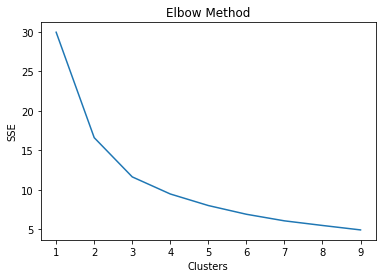

In [ ]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1,10):
    k_means = KMeans(n_clusters=i,init='k-means++', random_state=42)
    k_means.fit(cbo_scaled)
    wcss.append(k_means.inertia_)
plt.title('Elbow Method')
plt.plot(np.arange(1,10),wcss)
plt.xlabel('Clusters')
plt.ylabel('SSE')
plt.show()

In [ ]:
k_means_optimum = KMeans(n_clusters = 4, init = 'k-means++')
y = k_means_optimum.fit_predict(cbo_scaled)
df['cluster'] = y

In [ ]:
df

,itemID,title,author,publisher,main topic,subtopics,click,basket,order,cluster
0,21310,Princess Poppy: The Big Mix Up,Janey Louise Jones,Penguin Random House Children's UK,YFB,[5AH],3.0,0.0,0.0,0
1,73018,Einfach zeichnen! Step by Step,Wiebke Krabbe,Schwager und Steinlein,AGZ,"[5AJ,AGZ,WFA,YBG,YBL,YNA,YPA]",75.0,5.0,1.0,3
2,19194,Red Queen 1,Victoria Aveyard,Orion Publishing Group,YFH,"[5AP,FBA]",217.0,13.0,1.0,3
3,40250,Meine Kindergarten-Freunde (Pirat),,Ars Edition GmbH,YB,"[5AC,5AD,YBG,YBL,YF]",352.0,6.0,0.0,3
4,46107,Mein großes Schablonen-Buch - Wilde Tiere,Elizabeth Golding,Edition Michael Fischer,WFTM,"[WD,WFTM,YBG,YBL,YBLD,YBLN1]",47.0,3.0,1.0,0
...,...,...,...,...,...,...,...,...,...,...
78025,37678,Timeless Fairy Tales,"Brothers Grimm, Marie-Catherine Baroness D'Aulnoy",MEDIAMORPHOSIS,YFA,[YFJ],0.0,0.0,0.0,0
78026,68688,Demon Games,A. Witt Timothy a. Witt,iUniverse,FMB,[],0.0,0.0,0.0,0
78027,57291,Lori and the Lion's Den,A. M. Glass,Xlibris,YFU,[],0.0,0.0,0.0,0
78028,78130,The Everywhere Armchair,Ersila Bee,ELOQUENT BOOKS,YFC,"[YFG,YFH]",0.0,0.0,0.0,0


In [ ]:
df['cluster'].unique()

array([0, 3, 2, 1])

In [ ]:
cluster0 = df[df.cluster==0]
cluster1 = df[df.cluster==1]
cluster2 = df[df.cluster==2]
cluster3 = df[df.cluster==3]

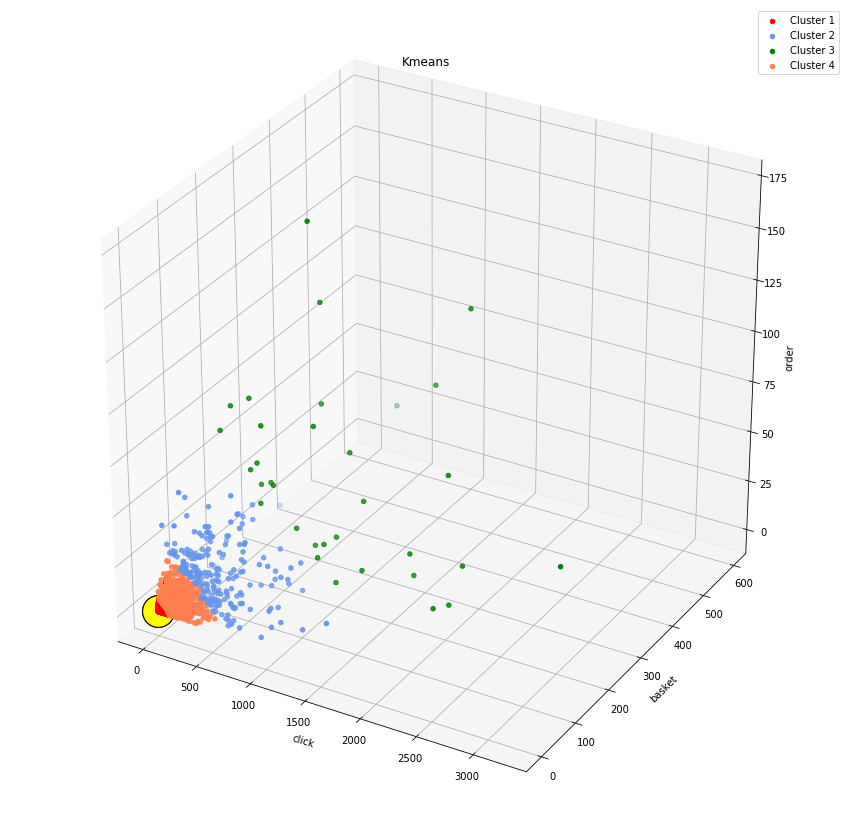

In [ ]:
from mpl_toolkits.mplot3d import axes3d, Axes3D
plt.figure(figsize=(15,15))
kplot = plt.axes(projection='3d')
xline = np.linspace(0, 15, 1000)
yline = np.linspace(0, 15, 1000)
zline = np.linspace(0, 15, 1000)
kplot.plot3D(xline, yline, zline, 'black')

kplot.set_xlabel('click')
kplot.set_ylabel('basket')
kplot.set_zlabel('order')

kplot.scatter3D(cluster0.click, cluster0.basket, cluster0.order, c='red', label = 'Cluster 1')
kplot.scatter3D(cluster1.click, cluster1.basket, cluster1.order, c='cornflowerblue', label = 'Cluster 2')
kplot.scatter3D(cluster2.click, cluster2.basket, cluster2.order, c='green', label = 'Cluster 3')
kplot.scatter3D(cluster3.click, cluster3.basket, cluster3.order, c='coral', label = 'Cluster 4')

plt.scatter(k_means_optimum.cluster_centers_[:,0], k_means_optimum.cluster_centers_[:,1], color = 'yellow', s = 1000,edgecolors='black')
plt.legend()
plt.title("Kmeans")
plt.show()

In [ ]:
df

,itemID,title,author,publisher,main topic,subtopics,click,basket,order,cluster
0,21310,Princess Poppy: The Big Mix Up,Janey Louise Jones,Penguin Random House Children's UK,YFB,[5AH],3.0,0.0,0.0,0
1,73018,Einfach zeichnen! Step by Step,Wiebke Krabbe,Schwager und Steinlein,AGZ,"[5AJ,AGZ,WFA,YBG,YBL,YNA,YPA]",75.0,5.0,1.0,3
2,19194,Red Queen 1,Victoria Aveyard,Orion Publishing Group,YFH,"[5AP,FBA]",217.0,13.0,1.0,3
3,40250,Meine Kindergarten-Freunde (Pirat),,Ars Edition GmbH,YB,"[5AC,5AD,YBG,YBL,YF]",352.0,6.0,0.0,3
4,46107,Mein großes Schablonen-Buch - Wilde Tiere,Elizabeth Golding,Edition Michael Fischer,WFTM,"[WD,WFTM,YBG,YBL,YBLD,YBLN1]",47.0,3.0,1.0,0
...,...,...,...,...,...,...,...,...,...,...
78025,37678,Timeless Fairy Tales,"Brothers Grimm, Marie-Catherine Baroness D'Aulnoy",MEDIAMORPHOSIS,YFA,[YFJ],0.0,0.0,0.0,0
78026,68688,Demon Games,A. Witt Timothy a. Witt,iUniverse,FMB,[],0.0,0.0,0.0,0
78027,57291,Lori and the Lion's Den,A. M. Glass,Xlibris,YFU,[],0.0,0.0,0.0,0
78028,78130,The Everywhere Armchair,Ersila Bee,ELOQUENT BOOKS,YFC,"[YFG,YFH]",0.0,0.0,0.0,0


In [ ]:
def concat_input(df):
    textFeat = str(df['main topic']) + ','
    textFeat += str(df['subtopics']) + ','
    textFeat += str(df['cluster'])
    x = textFeat.replace('[','')
    y = x.replace(']','')
    return y

In [ ]:
df['input recommend'] = df.apply(concat_input, axis = 1)

In [ ]:
df

,itemID,title,author,publisher,main topic,subtopics,click,basket,order,cluster,input recommend
0,21310,Princess Poppy: The Big Mix Up,Janey Louise Jones,Penguin Random House Children's UK,YFB,[5AH],3.0,0.0,0.0,0,"YFB,5AH,0"
1,73018,Einfach zeichnen! Step by Step,Wiebke Krabbe,Schwager und Steinlein,AGZ,"[5AJ,AGZ,WFA,YBG,YBL,YNA,YPA]",75.0,5.0,1.0,3,"AGZ,5AJ,AGZ,WFA,YBG,YBL,YNA,YPA,3"
2,19194,Red Queen 1,Victoria Aveyard,Orion Publishing Group,YFH,"[5AP,FBA]",217.0,13.0,1.0,3,"YFH,5AP,FBA,3"
3,40250,Meine Kindergarten-Freunde (Pirat),,Ars Edition GmbH,YB,"[5AC,5AD,YBG,YBL,YF]",352.0,6.0,0.0,3,"YB,5AC,5AD,YBG,YBL,YF,3"
4,46107,Mein großes Schablonen-Buch - Wilde Tiere,Elizabeth Golding,Edition Michael Fischer,WFTM,"[WD,WFTM,YBG,YBL,YBLD,YBLN1]",47.0,3.0,1.0,0,"WFTM,WD,WFTM,YBG,YBL,YBLD,YBLN1,0"
...,...,...,...,...,...,...,...,...,...,...,...
78025,37678,Timeless Fairy Tales,"Brothers Grimm, Marie-Catherine Baroness D'Aulnoy",MEDIAMORPHOSIS,YFA,[YFJ],0.0,0.0,0.0,0,"YFA,YFJ,0"
78026,68688,Demon Games,A. Witt Timothy a. Witt,iUniverse,FMB,[],0.0,0.0,0.0,0,"FMB,,0"
78027,57291,Lori and the Lion's Den,A. M. Glass,Xlibris,YFU,[],0.0,0.0,0.0,0,"YFU,,0"
78028,78130,The Everywhere Armchair,Ersila Bee,ELOQUENT BOOKS,YFC,"[YFG,YFH]",0.0,0.0,0.0,0,"YFC,YFG,YFH,0"


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
concat_input_matrix = vectorizer.fit_transform(df['input recommend'])
concat_input_matrix

<78030x1738 sparse matrix of type '<class 'numpy.float64'>'
	with 176961 stored elements in Compressed Sparse Row format>

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
cos_sim = cosine_similarity(concat_input_matrix, concat_input_matrix)

MemoryError: Unable to allocate 45.4 GiB for an array with shape (78030, 78030) and data type float64